In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine,reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [30]:
# Find the most recent date in the data set.
last_entry = session.query(measurement.date).order_by(measurement.date.desc()).first()
last_entry
precip_df

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,0.02
4,2016-08-23,1.79
...,...,...
2014,2017-08-22,0.00
2018,2017-08-23,0.00
2019,2017-08-23,0.08
2017,2017-08-23,0.00


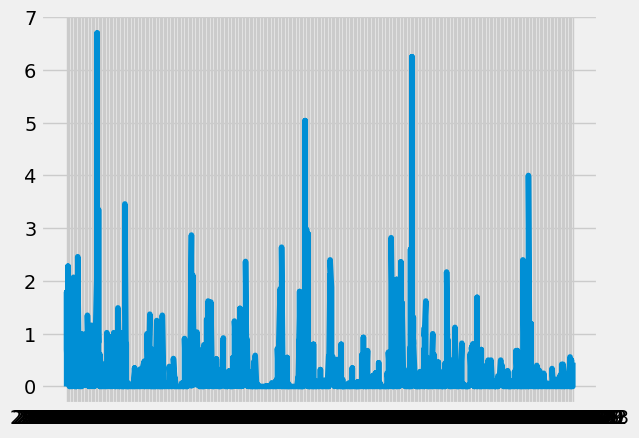

In [39]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
last_year_precip = session.query(measurement.date, measurement.prcp)\
              .filter(measurement.date >= year_ago, measurement.prcp != None)\
              .order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names

precip_df = pd.DataFrame(last_year_precip,columns=['Date','Precipitation'])
# Sort the dataframe by date
precip_df.sort_values(by='Date',inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(precip_df['Date'], precip_df['Precipitation'])

In [26]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [41]:
# Design a query to calculate the total number of stations in the dataset
session.query(measurement.station).distinct().count()

9

In [43]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(measurement.station,func.count(measurement.station)).\
                    group_by(measurement.station).\
                    order_by(func.count(measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [45]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
result = session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).\
                filter(measurement.station == 'USC00519281').order_by(func.min(measurement.tobs)).all()
result

[(54.0, 85.0, 71.66378066378067)]

<AxesSubplot:ylabel='Frequency'>

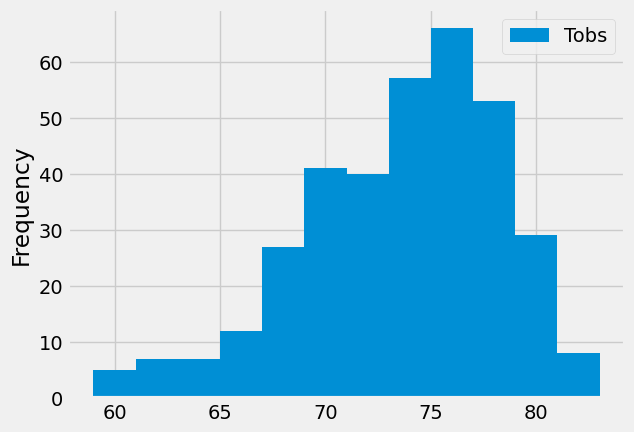

In [53]:
# Using the most active station id
year_temp = session.query(measurement.tobs).\
      filter(measurement.date >= year_ago, measurement.station == 'USC00519281').\
      order_by(measurement.tobs).all()
df = pd.DataFrame(year_temp,columns=['Tobs'])
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
df.plot.hist(bins=12)

# Close Session

In [54]:
# Close Session
session.close()